## 1

先编写以下的函数:

```OCTAVE
function [xt, nt] = MyShift(x, n, n0)
%   [xt, nt] = MyShift(x, n, n0)
%   time-shifts input signal [x ,n] by n0, and returns time-shifted
%   signal [xt, nt].
xt=x;
nt=n+n0;
end

function [xt, nt] = MyFlip(x, n)
%   [xt, nt] = MyFlip(x, n)
%   flips input signal [x ,n], and returns flipped signal [xt, nt].
n1=-n;
[xt, nt]=ZeroPadSignal(x,n1,n1);
end

function [xt, nt] = MyDiff(x, n)
%   [xt, nt] = MyDiff(x, n)
%   returns the first difference signal [xt, nt] of 
%   the input signal [x, n].
n1=[min(n)-1,n,max(n)+1];
[x1, nt]=ZeroPadSignal(x,n,n1);
xt=diff(x1);
nt(1)=[];
end

function [xt, nt] = MySum(x, n)
%   [xt, nt] = MySum(x, n)
%   returns the running sum signal [xt, nt] of 
%   the input signal [x, n].
summ=0;
xt=zeros(1,length(n));
for K=1:length(n)
    summ=summ+x(K);
    xt(K)=summ;
end
nt=n;
end

function [xt, nt] = MyConv(x1, n1, x2, n2)
%   [xt, nt] = MyConv(x, n)
%   convolutes two signal [x1, n1] and [x2, n2], and returns the 
%   resulting signal [xt, nt].
xt=conv(x1,x2);
n0=n1(1)+n2(1);
nt=n0:(n0+length(xt)-1);
end
```

注意`MyDiff`函数需要先作补零扩展再差分。`MySum`函数也可以用MATLAB提供的`cumsum`函数实现：

```Octave
function [xt, nt] = MySum(x, n)
xt=cumsum(x);
nt=n;
end
```

利用以上的函数，即可画出信号：


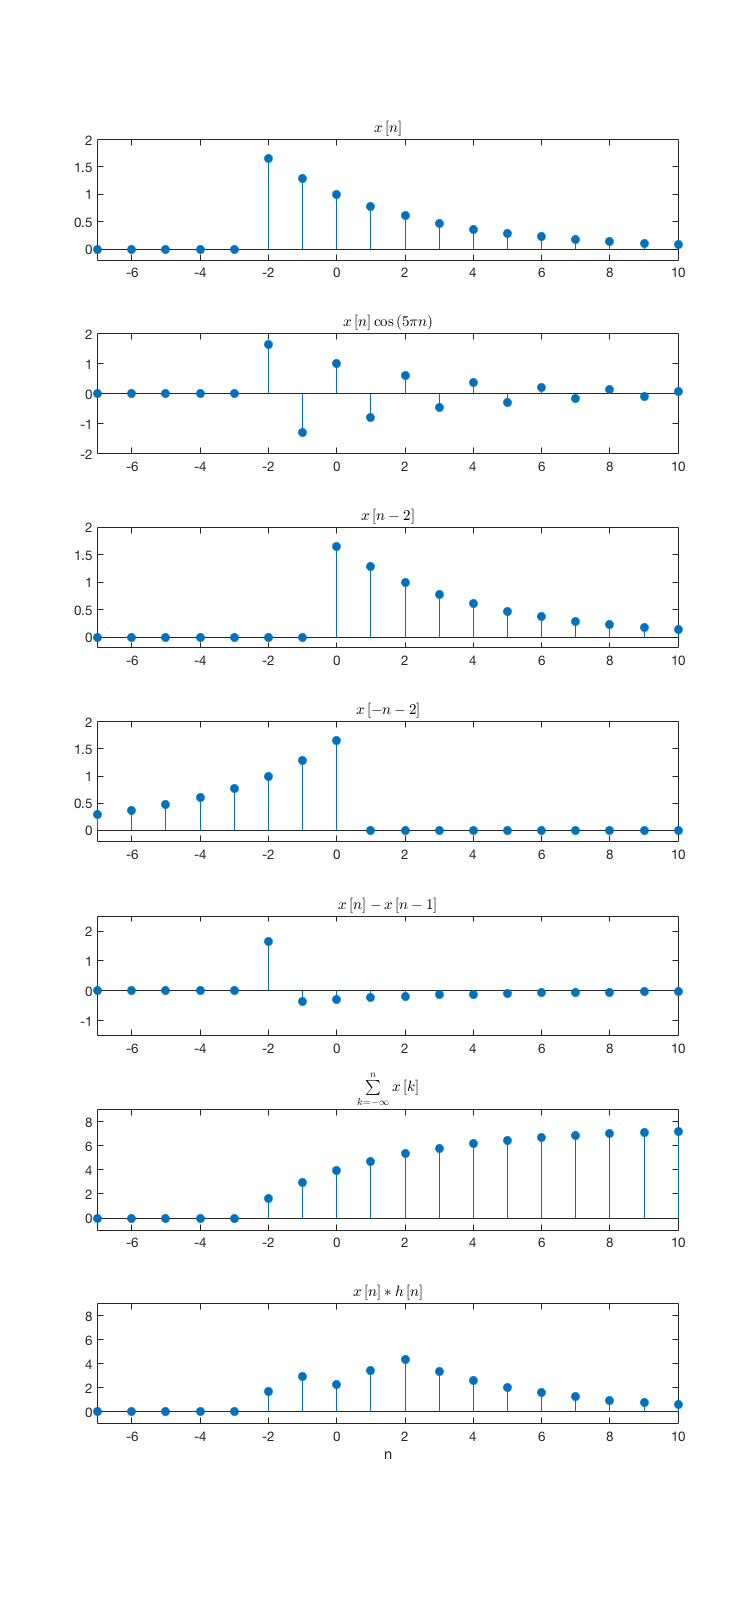

In [2]:
%plot -s 750,1600
na=-2:12; xa=exp(-na/4);
xb=xa.*cos(5*pi*na);
[xc, nc]=MyShift(xa,na,2);
[xd, nd]=MyFlip(xc,nc);
[xe, ne]=MyDiff(xa,na);
[xf, nf]=MySum(xa,na);
[xg, ng]=MyConv(xa,na,[1 1 0 1 1], 0:4);
n=-14:16;
ax=[-10 10];
subplot(7,1,1), stem(n,ZeroPadSignal(xa,na,n),'filled'); 
axis([-7 10 -0.2 2]); 
title('$x\left[ n \right]$','interpreter','latex');
subplot(7,1,2), stem(n,ZeroPadSignal(xb,na,n),'filled'); 
axis([-7 10 -2 2]); 
title('$x\left[ n \right]\cos \left(5 \pi n \right)$','interpreter','latex');
subplot(7,1,3), stem(n,ZeroPadSignal(xc,nc,n),'filled'); 
axis([-7 10 -0.2 2]);  
title('$x\left[ n-2 \right]$','interpreter','latex');
subplot(7,1,4), stem(n,ZeroPadSignal(xd,nd,n),'filled');
axis([-7 10 -0.2 2]);  
title('$x\left[ -n-2 \right]$','interpreter','latex');
subplot(7,1,5), stem(n,ZeroPadSignal(xe,ne,n),'filled');
axis([-7 10 -1.5 2.5]);  
title('$x\left[ n \right]-x\left[ n-1 \right] $','interpreter','latex');
subplot(7,1,6), stem(n,ZeroPadSignal(xf,nf,n),'filled'); 
axis([-7 10 -1 9]);
title('$\sum\limits_{k=-\infty}^n{x\left[k\right]}$','interpreter','latex');
subplot(7,1,7), stem(n,ZeroPadSignal(xg,ng,n),'filled'); 
axis([-7 10 -1 9]); xlabel('n');
title('$x\left[ n \right]*h\left[ n \right]$','interpreter','latex');

## 2

脚本程序如下：

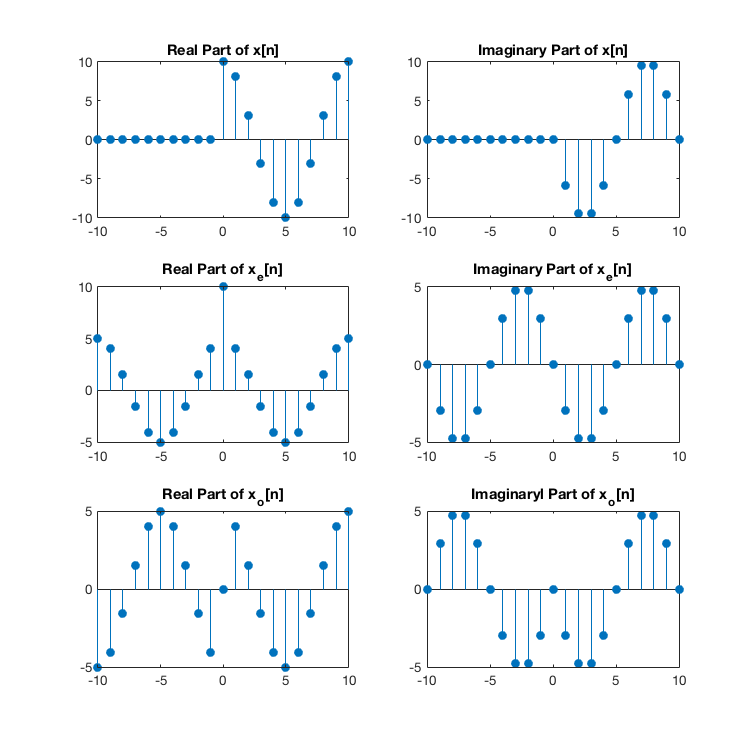

In [3]:
%plot -s 750,750
n=0:10; x=10*exp(-1j*0.2*pi*n);
np=-10:10;
[xf, nf]=MyFlip(x,n);
[x,n]=ZeroPadSignal(x,n,np);
[xf,nf]=ZeroPadSignal(xf,nf,np);
xe=0.5*(x+conj(xf));
x0=0.5*(x-conj(xf));

subplot(3,2,1), stem(np,real(x),'filled');
title('Real Part of x[n]');
subplot(3,2,2), stem(np,imag(x),'filled');
title('Imaginary Part of x[n]');
subplot(3,2,3), stem(np,real(xe),'filled');
title('Real Part of x_e[n]');
subplot(3,2,4), stem(np,imag(xe),'filled');
title('Imaginary Part of x_e[n]');
subplot(3,2,5), stem(np,real(x0),'filled');
title('Real Part of x_o[n]');
subplot(3,2,6), stem(np,imag(x0),'filled');
title('Imaginaryl Part of x_o[n]');


可以看出序列的共轭对称分量的实部为偶函数，虚部为奇函数；而共轭反对称分量则相反，实部为奇函数，虚部为偶函数。

## 3

本题实际上是用梯形公式来求定积分的近似解，脚本程序如下：


r =

   -2.0000



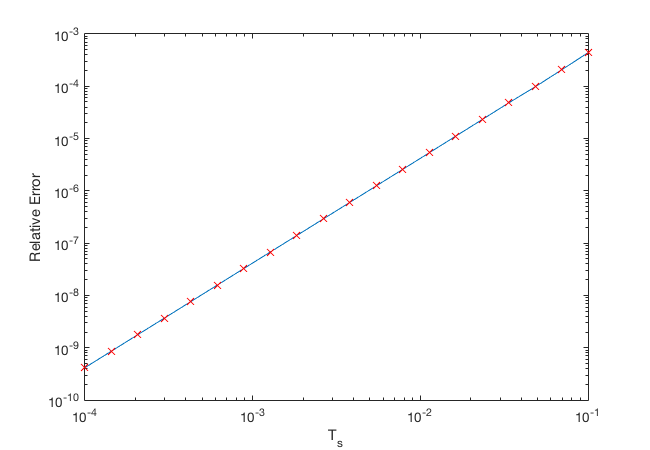

In [4]:
%plot -s 650,450
Ts=logspace(-1,-4,20);
x=zeros(1,length(Ts));
for K=1:length(Ts)
    T=Ts(K);
    m=floor(pi/T);
    t=T*((1:m)-0.5);
    x(K)=T*sum(t.*cos(t));
    x(K)=x(K)+(pi-m*T)*0.5*(pi+m*T)*cos(0.5*(pi+m*T));
end
r=integral( @(x) x.*cos(x),0,pi)
plot(Ts,abs((x-r)/r),Ts,abs((x-r)/r),'rx');
set(gca,'xscale','log','yscale','log');
xlabel('T_s'); ylabel('Relative Error');

其中第8行的作用是加上剩余的$t \in [mT_s,\pi]$区间的积分值。显然$T_s$取得越小，结果越准确。

## 4

脚本程序如下：

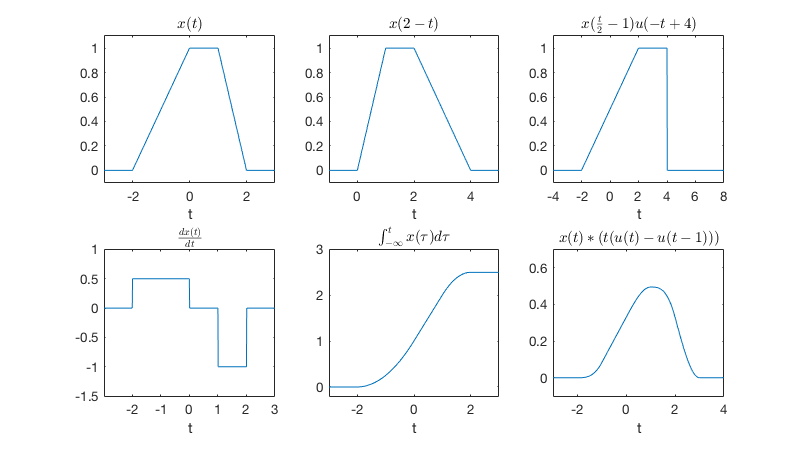

In [5]:
%plot -s 800,450
Ts=1.e-2;
t=-3:Ts:3;
x=(0.5*t+1).*((t>=-2)-(t>=0))+((t>=-0)-(t>=1))+ ...
    (-t+2).*((t>=1)-(t>=2));

ta=-t+2;

tb=2*(t+1); xb=x.*(tb<=4);

tc=t; tc(1)=[]; xc=diff(x)/Ts; 

xd=cumsum(x)*Ts;

xe=conv(x,t.*((t>=0)-(t>=1)))*Ts;
te=t(1)+t(1)+(0:length(xe)-1)*Ts;

subplot(2,3,1); plot(t,x); axis([min(t) max(t) -0.1 1.1]);
xlabel('t'); title('$x(t)$','interpreter','latex');
subplot(2,3,2); plot(ta,x); axis([min(ta) max(ta) -0.1 1.1]);
xlabel('t'); title('$x(2-t)$','interpreter','latex');
subplot(2,3,3); plot(tb,xb); axis([min(tb) max(tb) -0.1 1.1]);
xlabel('t'); title('$x(\frac{t}{2} - 1)u(-t+4)$',...
        'interpreter','latex');
subplot(2,3,4); plot(tc,xc); axis([min(tc) max(tc) -1.5 1]);
xlabel('t'); title('$\frac{dx(t)}{dt}$',...
        'interpreter','latex');
subplot(2,3,5); plot(t,xd); axis([min(t) max(t) -0.2 3]);
xlabel('t'); title('$\int_{-\infty }^t {x(\tau)} d\tau$',...
        'interpreter','latex');
subplot(2,3,6); plot(te,xe); axis([-3 4 -0.1 0.7]);
xlabel('t'); title('$x(t)*(t({u(t)-u({t - 1})}))$',...
        'interpreter','latex');

# 思考题

## 1

(a) 假设$h$的长度为$m$，那么矩阵$H$为：

$H = \left[ {\begin{array}{*{20}{c}}
{{h_1}}&0& \cdots &0&0\\
{{h_2}}&{{h_1}}& \cdots & \vdots & \vdots \\
{{h_3}}&{{h_2}}& \cdots &0&0\\
 \vdots &{{h_3}}& \cdots &{{h_1}}&0\\
{{h_{m - 1}}}& \vdots & \cdots &{{h_2}}&{{h_1}}\\
{{h_m}}&{{h_{m - 1}}}& \vdots & \vdots &{{h_2}}\\
0&{{h_m}}& \cdots &{{h_{m - 2}}}& \vdots \\
0&0& \cdots &{{h_{m - 1}}}&{{h_{m - 2}}}\\
 \vdots & \vdots & \vdots &{{h_m}}&{{h_{m - 1}}}\\
0&0&0& \cdots &{{h_m}}
\end{array}} \right]$

(b) 

```OCTAVE
function [y, H] = conv_tp(x, h)
%Convolution using Toeplitz Matrix
%  [y, H] = conv_tp(x, h)
%   y = output sequence in column vector form
%   H = Toeplitz matrix corresponding to h so that y = Hx
%   x, h = input sequences in column vector form
lx=length(x);
lh=length(h);
r=zeros(1,lx);
c=zeros(1,lx+lh-1);
r(1)=h(1);
c(1:lh)=h;
H=toeplitz(c,r);
y=H*x';
y=y';
end;
```